In [72]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data 

## Exercise hypothesis testing


### 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?

#### A: one sample, one sample t-test,  two tail
- Are adults who drink milk taller than adults who dont drink milk?

#### A: two sample one tail independent t-test

- Is the the price of gas higher in texas or in new mexico?

#### A:  two sample one tail independent t-test

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
#### A:  anova test 

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [3]:
a = 0.05

H$_0$ : Average time it takes to sell homes is not different for two offices

H$_a$ : Average time it takes to sell homes is different for two offices

In [11]:
p_value = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50)[1]

In [15]:
p_value  < a

True

### 3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [13]:
mpg = data('mpg')

In [81]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_econ,is_compact,auto_transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,True,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,True,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,True,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,True,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,True,True


H$_0$ : There is no difference in fuel-efficiency in cars from 2008 vrs 1999

H$_a$ : There is a difference in fuel-efficiency in cars from 2008 vrs 1999

In [77]:
mpg["avg_fuel_econ"] = stats.hmean((mpg['cty'], mpg['hwy'])) 

In [78]:
old_cars = mpg[mpg.year == 1999].avg_fuel_econ
new_cars = mpg[mpg.year != 1999].avg_fuel_econ

In [79]:
_, levene_p = stats.levene( new_cars, old_cars)

In [80]:
levene_p < a

False

In [83]:
t_stat, p_val = stats.ttest_ind(old_cars, new_cars)

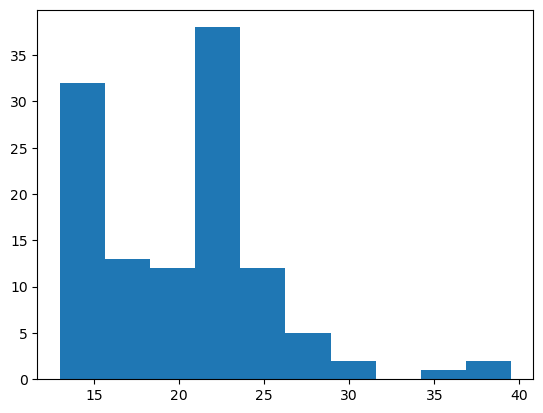

In [43]:
plt.hist(old_cars);

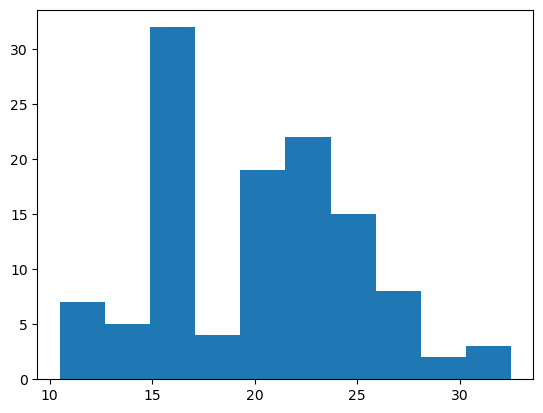

In [45]:
plt.hist(new_cars);

In [84]:
p_val < a


False

### Are compact cars more fuel-efficient than the average car?

In [48]:
mpg["is_compact"] = mpg["class"].str.startswith("compact")

In [50]:
compact = mpg[mpg.is_compact == True].avg_fuel_econ
not_compact = mpg[mpg.is_compact != True].avg_fuel_econ

H$_0$ : There is no difference in fuel-efficiency in compact cars vrs non compact cars

H$_a$ : There is a difference in fuel-efficiency in compact cars vrs non compact cars

In [55]:
_, levene_p = stats.levene( new_cars, old_cars)

In [56]:
levene_p < a

False

In [85]:
t_stat, p_val = stats.ttest_ind(compact, not_compact, equal_var=True)

In [88]:
((p_val / 2) < a) and (t_stat > 0)

True

### Do manual cars get better gas mileage than automatic cars?

H$_0$ : There is no difference in highway mileage in auto and manual vehicle

H$_a$ : There is a difference in highway mileage in auto and manual vehicle

In [63]:
mpg["auto_transmission"] = mpg.trans.str.startswith("auto")

In [91]:
auto = mpg[mpg['auto_transmission'] == True].avg_fuel_econ
manual = mpg[mpg['auto_transmission'] != True].avg_fuel_econ

In [92]:
_, levene_p = stats.levene(auto, manual)

In [93]:
levene_p < a

False

In [96]:
t_stat, p_val = stats.ttest_ind(manual, auto, equal_var=True)

In [97]:
p_val < a

True

---------------------------------------------------------------------------------------------------------------

# Correlation

### Exercises

#### 1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
- Do guys and gals quit their jobs at the same rate?
- Does the length of time of the lecture correlate with a students grade?

In [ ]:
# 1.1 continuous vrs continuous pearsonsr for corralation 

In [ ]:
# 1.2  cat vrs cat chi^2

In [ ]:
# 1.3  continuous vrs continuous pearsonr

#### 2. Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [8]:
telco = pd.read_csv('telco_data.csv', sep='\t', encoding='UTF 16')

In [9]:
telco.head()

,Add-on Count,Churn,Contract,Customer ID,Dependents,Device Protection,Gender,Internet Service,Multiple Lines,Online Backup,...,Tech Support,with Online Backup,with Online Security,with Streaming Movies,with Streaming TV,with Tech Support,Estimated Tenure(months),Monthly Charges,Tenure,Total Charges
0,0,No,Month-to-month,7590-VHVEG,None,Device Wiithout Protection,Female,DSL,No phone service,Online Backup,...,Support Not Contacted,0,0,0,0,0,1.0,29.85,1,29.85
1,0,No,One year,5575-GNVDE,None,Protected Device,Male,DSL,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,33.0,56.95,34,1889.50
2,0,Yes,Month-to-month,3668-QPYBK,None,Device Wiithout Protection,Male,DSL,Single Line,Online Backup,...,Support Not Contacted,0,0,0,0,0,2.0,53.85,2,108.15
3,0,No,One year,7795-CFOCW,None,Protected Device,Male,DSL,No phone service,Internet With No Backup,...,Has a Support Ticket,0,0,0,0,0,43.0,42.30,45,1840.75
4,0,Yes,Month-to-month,9237-HQITU,None,Device Wiithout Protection,Female,Fiber optic,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,2.0,70.70,2,151.65


In [12]:
tenure = telco.Tenure 
monthly_charges = telco['Monthly Charges']

In [18]:
a = 0.05

H$_0$ : There is a no correlation with tenure and monthly charges

H$_a$ : There is a correlation with tenure and monthly charges

In [14]:
r, p = stats.pearsonr(tenure, monthly_charges)

In [49]:
p < a
p

0.0

In [20]:
r

0.2478998562861518

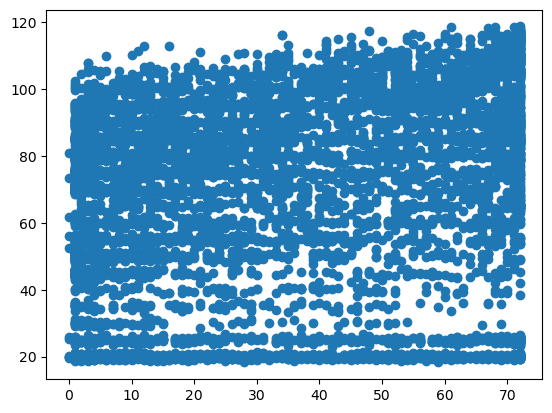

In [22]:
plt.scatter(tenure, monthly_charges)

### H$_0$ : There is a no correlation with tenure and total charges

### H$_a$ : There is a correlation with tenure and total charges

In [35]:
total_charges = telco['Total Charges'].fillna(0)
total_charges 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    6822.15
7039    4146.05
7040    4534.90
7041    7548.10
7042    4541.20
Name: Total Charges, Length: 7043, dtype: float64

In [36]:
r, p = stats.pearsonr(tenure, total_charges)

In [48]:
p < a


True

In [41]:
r

0.8261783979502477

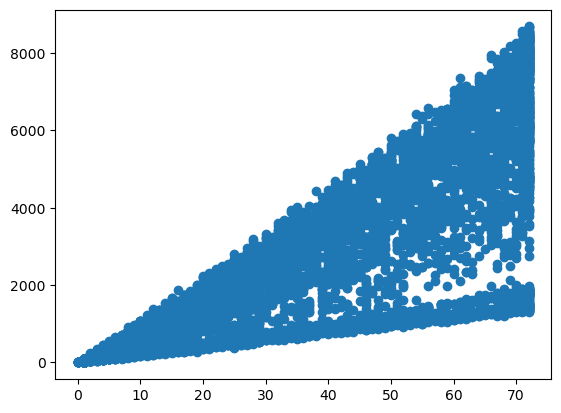

In [42]:
plt.scatter(tenure, total_charges);

### H$_0$ : There is a no correlation with single line phone service with dsl and monthly charges

### H$_a$ : There is a correlation with  single line phone service with dsl and monthly charges

In [103]:
telco.head()

,Add-on Count,Churn,Contract,Customer ID,Dependents,Device Protection,Gender,Internet Service,Multiple Lines,Online Backup,...,Tech Support,with Online Backup,with Online Security,with Streaming Movies,with Streaming TV,with Tech Support,Estimated Tenure(months),Monthly Charges,Tenure,Total Charges
0,0,No,Month-to-month,7590-VHVEG,None,Device Wiithout Protection,Female,DSL,No phone service,Online Backup,...,Support Not Contacted,0,0,0,0,0,1.0,29.85,1,29.85
1,0,No,One year,5575-GNVDE,None,Protected Device,Male,DSL,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,33.0,56.95,34,1889.50
2,0,Yes,Month-to-month,3668-QPYBK,None,Device Wiithout Protection,Male,DSL,Single Line,Online Backup,...,Support Not Contacted,0,0,0,0,0,2.0,53.85,2,108.15
3,0,No,One year,7795-CFOCW,None,Protected Device,Male,DSL,No phone service,Internet With No Backup,...,Has a Support Ticket,0,0,0,0,0,43.0,42.30,45,1840.75
4,0,Yes,Month-to-month,9237-HQITU,None,Device Wiithout Protection,Female,Fiber optic,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,2.0,70.70,2,151.65


In [61]:
telco['Internet Service'].count_values()

In [104]:
single_lines_with_dsl = telco[(telco['Multiple Lines'] == "Single Line") & (telco['Internet Service'] == "DSL")].fillna(0)
single_lines_with_dsl.head()

,Add-on Count,Churn,Contract,Customer ID,Dependents,Device Protection,Gender,Internet Service,Multiple Lines,Online Backup,...,Tech Support,with Online Backup,with Online Security,with Streaming Movies,with Streaming TV,with Tech Support,Estimated Tenure(months),Monthly Charges,Tenure,Total Charges
1,0,No,One year,5575-GNVDE,None,Protected Device,Male,DSL,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,33.0,56.95,34,1889.50
2,0,Yes,Month-to-month,3668-QPYBK,None,Device Wiithout Protection,Male,DSL,Single Line,Online Backup,...,Support Not Contacted,0,0,0,0,0,2.0,53.85,2,108.15
9,0,No,One year,6388-TABGU,Has Dependants,Device Wiithout Protection,Male,DSL,Single Line,Online Backup,...,Support Not Contacted,0,0,0,0,0,62.0,56.15,62,3487.95
10,0,No,Month-to-month,9763-GRSKD,Has Dependants,Device Wiithout Protection,Male,DSL,Single Line,Internet With No Backup,...,Support Not Contacted,0,0,0,0,0,11.0,49.95,13,587.45
18,0,Yes,Month-to-month,4190-MFLUW,Has Dependants,Protected Device,Female,DSL,Single Line,Internet With No Backup,...,Has a Support Ticket,0,0,0,0,0,9.0,55.20,10,528.35


In [105]:
r, p = stats.pearsonr(single_lines_with_dsl['Tenure'], single_lines_with_dsl['Monthly Charges'])

In [106]:
p < a

True

In [100]:
r

0.5587305304603047

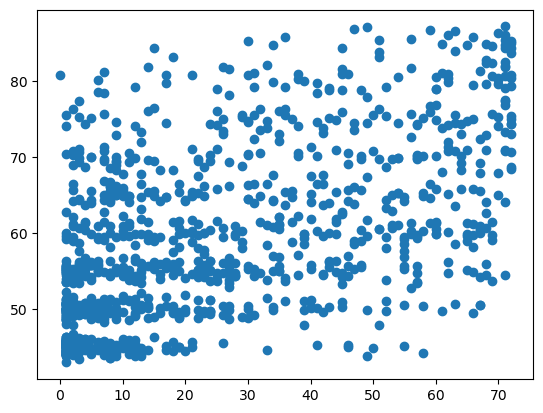

In [107]:
plt.scatter(single_lines_with_dsl['Tenure'], single_lines_with_dsl['Monthly Charges']);

### H$_0$ : There is a no correlation with mulit line phone service with dsl and monthly charges

### H$_a$ : There is a correlation with  mulit line phone service with dsl and monthly charges

In [108]:
multi_lines_with_dsl = telco[(telco['Multiple Lines'] == "Multiple Lines") & (telco['Internet Service'] == "DSL")].fillna(0)

In [109]:
multi_lines_with_dsl.head()

,Add-on Count,Churn,Contract,Customer ID,Dependents,Device Protection,Gender,Internet Service,Multiple Lines,Online Backup,...,Tech Support,with Online Backup,with Online Security,with Streaming Movies,with Streaming TV,with Tech Support,Estimated Tenure(months),Monthly Charges,Tenure,Total Charges
23,0,No,Two year,3638-WEABW,None,Device Wiithout Protection,Female,DSL,Multiple Lines,Online Backup,...,Has a Support Ticket,0,0,0,0,0,58.0,59.90,58,3505.10
28,0,No,Two year,5248-YGIJN,None,Protected Device,Male,DSL,Multiple Lines,Online Backup,...,Has a Support Ticket,0,0,0,0,0,70.0,90.25,72,6369.45
41,0,No,Two year,9489-DEDVP,Has Dependants,Device Wiithout Protection,Female,DSL,Multiple Lines,Online Backup,...,Support Not Contacted,0,0,0,0,0,70.0,69.20,70,4872.35
43,0,No,Two year,4671-VJLCL,None,Protected Device,Female,DSL,Multiple Lines,Online Backup,...,Has a Support Ticket,0,0,0,0,0,60.0,79.85,63,4861.45
44,0,No,Month-to-month,4080-IIARD,None,Device Wiithout Protection,Female,DSL,Multiple Lines,Online Backup,...,Has a Support Ticket,0,0,0,0,0,12.0,76.20,13,981.45


In [110]:
r, p = stats.pearsonr(multi_lines_with_dsl['Tenure'], multi_lines_with_dsl['Monthly Charges'])

In [111]:
p < a 

True

In [112]:
r 

0.607584428481035

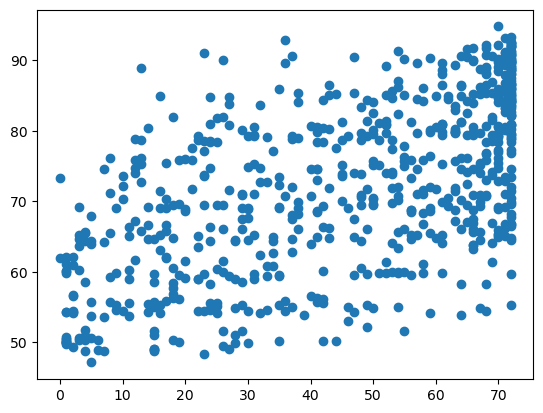

In [114]:
plt.scatter(multi_lines_with_dsl['Tenure'], multi_lines_with_dsl['Monthly Charges']);

#### 3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [140]:
from env import get_db_url

In [141]:
url = get_db_url('employees')

In [143]:
df = pd.read_sql("""SELECT
    DATEDIFF((SELECT MAX(hire_date) 
    FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
""", url)

In [144]:
df

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692
...,...,...
240119,2572,52868
240120,3410,69501
240121,5030,83441
240122,2298,55003


H$_0$ : There is a no correlation with tenure and salary

H$_a$ : There is a correlation with tenure and salary

In [145]:
r, p = stats.pearsonr(
    df['tenure'],
df['salary'])

In [146]:
p < a

True

In [147]:
r

0.3064625613186014

#### 4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

H$_0$ : There is a no correlation with reaction and days

H$_a$ : There is a correlation with reaction and days

In [82]:
sleep_study = data('sleepstudy')
sleep_study


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [84]:
days = sleep_study.Days
r_time = sleep_study.Reaction

In [85]:
r, p = stats.pearsonr(days, r_time)

In [86]:
p < a

True

In [87]:
r

0.5352302262650255

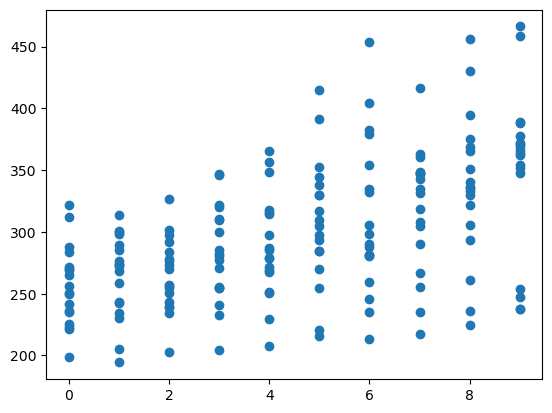

In [89]:
plt.scatter(days, r_time);

In [120]:
sleep_study.corr()

,Reaction,Days,Subject
Reaction,1.000000,5.352302e-01,1.828947e-01
Days,0.535230,1.000000e+00,3.499509e-16
Subject,0.182895,3.499509e-16,1.000000e+00


---------------------------------------------------------------------------------------------------------------

## Exercise comparison groups

#### 1. Answer with the type of stats test you would use (assume normal distribution):
- Do students get better test grades if they have a rubber duck on their desk?
- Does smoking affect when or not someone has lung cancer?
- Is gender independent of a person’s blood type?
- A farming company wants to know if a new fertilizer has improved crop yield or not
- Does the length of time of the lecture correlate with a students grade?
- Do people with dogs live in apartments more than people with cats?

In [ ]:
## t-test

In [ ]:
## chi-Square

In [ ]:
## Chi-Square

In [ ]:
## T-test

In [ ]:
## Pearsons Correlation

In [ ]:
# chi-Square

#### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [133]:
stats.chi2_contingency(([[49, 20],
        [1, 30]])) 

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

#### 3. Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
contingency table test with them. Be sure to state your null and alternative hypotheses.

In [135]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### H$_0$ : manufacturer and class are dependent of each other

### H$_a$ : manufacturer and class are independent of each other

In [137]:
observed = pd.crosstab(mpg['manufacturer'], mpg['class'])

In [138]:
stats.chi2_contingency(observed) 

(464.37214690582,
 5.267718408816259e-54,
 84,
 array([[0.38461538, 3.61538462, 3.15384615, 0.84615385, 2.53846154,
         2.69230769, 4.76923077],
        [0.40598291, 3.81623932, 3.32905983, 0.89316239, 2.67948718,
         2.84188034, 5.03418803],
        [0.79059829, 7.43162393, 6.48290598, 1.73931624, 5.21794872,
         5.53418803, 9.8034188 ],
        [0.53418803, 5.02136752, 4.38034188, 1.17521368, 3.52564103,
         3.73931624, 6.62393162],
        [0.19230769, 1.80769231, 1.57692308, 0.42307692, 1.26923077,
         1.34615385, 2.38461538],
        [0.2991453 , 2.81196581, 2.45299145, 0.65811966, 1.97435897,
         2.09401709, 3.70940171],
        [0.17094017, 1.60683761, 1.4017094 , 0.37606838, 1.12820513,
         1.1965812 , 2.11965812],
        [0.08547009, 0.8034188 , 0.7008547 , 0.18803419, 0.56410256,
         0.5982906 , 1.05982906],
        [0.06410256, 0.6025641 , 0.52564103, 0.14102564, 0.42307692,
         0.44871795, 0.79487179],
        [0.08547009, 0.803

#### 4. Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?


In [152]:
df = pd.read_sql("""select emp_no, gender, dept_name from employees join dept_emp using (emp_no) 
        join departments
        using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')""", url)
        

In [153]:
df.head()

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing


In [155]:
observed = pd.crosstab(df.gender, df.dept_name)

H 0 : gender is dependent of wether in sales or marketing

H 𝑎 : gender is independent of wether in sales or marketing

In [156]:
stats.chi2_contingency(observed) 

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [157]:
p < a

True

In [158]:
r

0.3064625613186014

In [161]:
df = pd.read_sql("""
    select emp_no, gender, dept_no
        from employees
            left join dept_manager
                using (emp_no)
""", url)

In [162]:
df.head()

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None


H 0 : employee's gender dependent of whether or not they are or have been a manager

H 𝑎 : employee's gender independent of whether or not they are or have been a manager

In [165]:
observed = pd.crosstab(df.gender, df.dept_no)

In [166]:
stats.chi2_contingency(observed) 

(7.888111888111889,
 0.4444754330422406,
 8,
 array([[1.08333333, 1.08333333, 1.08333333, 2.16666667, 1.08333333,
         2.16666667, 1.08333333, 1.08333333, 2.16666667],
        [0.91666667, 0.91666667, 0.91666667, 1.83333333, 0.91666667,
         1.83333333, 0.91666667, 0.91666667, 1.83333333]]))

In [ ]:
p <a